# Supply Chain Data Analysis

## Introduction

This Python notebook is dedicated to performing a comprehensive supply chain data analysis. The goal of the project is to gain insights into the **efficiency**, **performance**, and **potential bottlenecks** within the supply chain processes by utilizing various data analysis and visualization techniques.

The key objectives of the analysis include:

- **Data Quality Analysis**
- **Data Cleaning**
- **Descriptive Analytics**
- **Visualizing Orders, Market, and Supply Chain Metrics**

By the end of this analysis, stakeholders will have a clear understanding of the current state of the supply chain and recommendations for **process improvements** based on the data-driven insights gaine

Kaggle dataset link: [DataCo Smart Supply Chain for Big Data Analysis](https://www.kaggle.com/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis) from this


## I. Importing libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## II. Dataset importing

In [2]:
# Load the Data
df = pd.read_csv(r" .\..\Resources\DataCoSupplyChainDataset.csv", encoding='latin1')

In [3]:
# display data with all columns
pd.set_option('display.max_columns', None) 
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
# display data information
def data_info(df):
    print('Number of columns are : ',df.shape[1])
    print('Number of rows are : ',df.shape[0])
    print('Total number of data-points :',df.size)
    numerical_features = [f for f in df.columns if df[f].dtypes!='O']
    print('Count of Numerical Features :',len(numerical_features))
    cat_features = [c for c in df.columns if df[c].dtypes=='O']
    print('Count of Categorical Features :',len(cat_features))
data_info(df)

Number of columns are :  53
Number of rows are :  180519
Total number of data-points : 9567507
Count of Numerical Features : 29
Count of Categorical Features : 24


In [5]:
# display all columns as list
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

## III. Data quality analysis，cleansing and prepration

In [6]:
# drop unused columns 
df.drop([
    'Customer Email', 
    'Customer Password',
    'Product Image'
], axis = True, inplace = True)

In [7]:
# check the number of null values in each column
def features_with_missing_values(df):
    x = df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100
    print('Percentage of Total Missing Values is ' ,round(x,2) ,'%')
    print('Missing Value Estimation :')
    for i in df.columns:
        if df[i].isna().sum()>0:
            print('The Feature ',i,' has '+ str(df[i].isna().sum()) + ' missing values')
            
features_with_missing_values(df)

Percentage of Total Missing Values is  3.72 %
Missing Value Estimation :
The Feature  Customer Lname  has 8 missing values
The Feature  Customer Zipcode  has 3 missing values
The Feature  Order Zipcode  has 155679 missing values
The Feature  Product Description  has 180519 missing values


In [8]:
# no sense to keep the 'Order Zipcode' and the 'Product Description' columns, delete them from the dataframe
df.drop([
    'Order Zipcode',
    'Product Description'
], axis = 1, inplace = True)

## IV. Orders Analysis

### Question 1
List all the cities and the respective number of pending orders in 'France'?

In [9]:
# check order countries name and quantity
country_count = df['Order Country'].nunique()
country_list = sorted(df['Order Country'].unique())
print(f"Order country number: {country_count}")
print(f"Order country list: {country_list}")

Order country number: 164
Order country list: ['Afganistán', 'Albania', 'Alemania', 'Angola', 'Arabia Saudí', 'Argelia', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaiyán', 'Bangladés', 'Barbados', 'Baréin', 'Belice', 'Benín', 'Bielorrusia', 'Bolivia', 'Bosnia y Herzegovina', 'Botsuana', 'Brasil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Bután', 'Bélgica', 'Camboya', 'Camerún', 'Canada', 'Chad', 'Chile', 'China', 'Chipre', 'Colombia', 'Corea del Sur', 'Costa Rica', 'Costa de Marfil', 'Croacia', 'Cuba', 'Dinamarca', 'Ecuador', 'Egipto', 'El Salvador', 'Emiratos Árabes Unidos', 'Eritrea', 'Eslovaquia', 'Eslovenia', 'España', 'Estados Unidos', 'Estonia', 'Etiopía', 'Filipinas', 'Finlandia', 'Francia', 'Gabón', 'Georgia', 'Ghana', 'Grecia', 'Guadalupe', 'Guatemala', 'Guayana Francesa', 'Guinea', 'Guinea Ecuatorial', 'Guinea-Bissau', 'Guyana', 'Haití', 'Honduras', 'Hong Kong', 'Hungría', 'India', 'Indonesia', 'Irak', 'Irlanda', 'Irán', 'Israel', 'Italia', 'Jamaica', 'Japón', 'Jorda

In [10]:
# filter orders in France whose status is 'pending'
pending_cities_df = df[(df['Order Country'] == 'Francia') & (df['Order Status'] == 'PENDING')]
pending_cities_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Fname,Customer Id,Customer Lname,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
776,TRANSFER,2,4,11.950000,199.169998,Advance shipping,0,3,Baseball & Softball,San Jose,EE. UU.,Mary,11715,Smith,Consumer,CA,9761 Quaking Acres,95116.0,2,Fitness,37.360241,-121.845070,Europe,Mont-Saint-Aignan,Francia,11715,6/2/2015 13:06,10451,44,40.790001,0.17,26173,59.990002,0.06,4,239.960007,199.169998,11.950000,Western Europe,Normandía,PENDING,44,3,adidas Men's F10 Messi TRX FG Soccer Cleat,59.990002,0,6/4/2015 13:06,Standard Class
784,TRANSFER,3,4,-69.870003,116.440002,Advance shipping,0,13,Electronics,San Jose,EE. UU.,Lori,3246,Burns,Consumer,CA,4845 Thunder Embers Hollow,95148.0,3,Footwear,37.325542,-121.799347,Europe,Tourcoing,Francia,3246,6/22/2015 13:25,11822,282,11.520000,0.09,29569,31.990000,-0.60,4,127.959999,116.440002,-69.870003,Western Europe,Norte-Paso de Calais-Picardía,PENDING,282,13,Under Armour Women's Ignite PIP VI Slide,31.990000,0,6/25/2015 13:25,Standard Class
788,TRANSFER,3,4,147.830002,351.959992,Advance shipping,0,9,Cardio Equipment,Lancaster,EE. UU.,Mary,11388,Rangel,Consumer,CA,2395 Misty Carrefour,93535.0,3,Footwear,34.697033,-118.088303,Europe,Bry-sur-Marne,Francia,11388,9/11/2015 5:04,17347,191,48.000000,0.12,43356,99.989998,0.42,4,399.959992,351.959992,147.830002,Western Europe,Isla de Francia,PENDING,191,9,Nike Men's Free 5.0+ Running Shoe,99.989998,0,9/14/2015 5:04,Standard Class
791,TRANSFER,5,4,87.349998,335.970001,Late delivery,1,9,Cardio Equipment,Lompoc,EE. UU.,Jesse,7222,Stein,Consumer,CA,2225 Crystal Beach,93436.0,3,Footwear,34.587643,-120.408188,Europe,Niort,Francia,7222,6/20/2015 9:34,11674,191,63.990002,0.16,29198,99.989998,0.26,4,399.959992,335.970001,87.349998,Western Europe,Aquitania-Lemosín-Poitou-Charentes,PENDING,191,9,Nike Men's Free 5.0+ Running Shoe,99.989998,0,6/25/2015 9:34,Standard Class
796,TRANSFER,2,4,117.580002,235.160004,Advance shipping,0,17,Cleats,Virginia Beach,EE. UU.,Amber,8806,Diaz,Consumer,VA,6174 Bright Vista,23455.0,4,Apparel,36.855305,-76.194611,Europe,Nantes,Francia,8806,7/16/2017 4:08,63516,365,4.800000,0.02,158778,59.990002,0.50,4,239.960007,235.160004,117.580002,Western Europe,Países del Loira,PENDING,365,17,Perfect Fitness Perfect Rip Deck,59.990002,0,7/18/2017 4:08,Standard Class


In [11]:
# list relatrive cities number and name
pending_cities_list = sorted(pending_cities_df['Order City'].unique())
print(f"Order cities number: {pending_cities_df.shape[0]}")
print(f"Order cities list: {pending_cities_list}")

Order cities number: 1500
Order cities list: ['Abbeville', 'Aix-en-Provence', 'Alfortville', 'Amiens', 'Angers', 'Annecy', 'Antibes', 'Antony', 'Argenteuil', 'Arles', 'Arras', 'Aubervilliers', 'Aulnay-sous-Bois', 'Auxerre', 'Avignon', 'Bagneux', 'Bar-le-Duc', 'Bastia', 'Bayeux', 'Bayonne', 'Beauvais', 'Belfort', 'Biarritz', 'Bondy', 'Bordeaux', 'Boulogne-Billancourt', 'Boulogne-sur-Mer', 'Bourges', 'Bressuire', 'Brest', 'Bry-sur-Marne', 'Caen', 'Cagnes-sur-Mer', 'Calais', 'Cannes', 'Carcassonne', 'Carpentras', 'Carquefou', 'Castres', 'Cergy', 'Champigny-sur-Marne', 'Chartres', 'Chatou', 'Chaumont', 'Chaville', 'Chelles', 'Cherbourg-Octeville', 'Chevilly-Larue', 'Cholet', 'Clermont-Ferrand', 'Clichy', 'Clichy-sous-Bois', 'Cognac', 'Colmar', 'Colombes', 'Concarneau', 'Conflans-Sainte-Honorine', 'Corbeil-Essonnes', 'Cormeilles-en-Parisis', 'Courbevoie', "Cournon-d'Auvergne", 'Deuil-la-Barre', 'Dieppe', 'Dijon', 'Draguignan', 'Drancy', 'Dreux', 'Echirolles', 'Elbeuf', 'Evreux', 'Firminy', 

In [12]:
# pending order number in each city
city_counts = pending_cities_df['Order City'].value_counts()

# Top 10 cities which have the most pending orders
top_10_cities = city_counts.head(10)

#  pending order ratio in each city
total_orders = city_counts.sum()
city_ratios = (top_10_cities / total_orders) * 100
top_10_cities_df = pd.DataFrame({
    'Order Count': top_10_cities.values,
    'Ratio (%)': city_ratios.values
}, index=top_10_cities.index)

print(top_10_cities_df)

                     Order Count  Ratio (%)
Order City                                 
Paris                        100   6.666667
Marseille                     44   2.933333
Nice                          43   2.866667
Lyon                          37   2.466667
Toulouse                      33   2.200000
Champigny-sur-Marne           25   1.666667
Mulhouse                      22   1.466667
Bordeaux                      20   1.333333
Lille                         20   1.333333
Reims                         19   1.266667


### Question 2
Which country has the most suspected fraud?

In [13]:
# order number per order status
df['Order Status'].value_counts()

Order Status
COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: count, dtype: int64

In [14]:
suspected_fraud_df = df[df['Order Status'] == 'SUSPECTED_FRAUD']
suspected_fraud_df['Customer Country'].value_counts()

Customer Country
EE. UU.        2413
Puerto Rico    1649
Name: count, dtype: int64

In [15]:
suspected_fraud_df['Order Country'].value_counts()

Order Country
Estados Unidos    573
Francia           362
México            317
Alemania          227
Australia         197
                 ... 
Uzbekistán          1
Grecia              1
Bangladés           1
Somalia             1
Georgia             1
Name: count, Length: 102, dtype: int64

## V. Market Analysis

### Question 1
Which product(s) has/have the maximum discount?

In [16]:
# top 10 products with the highest total discount
df.groupby('Product Name')['Order Item Discount'].sum().sort_values(ascending = False).head(10)

Product Name
Field & Stream Sportsman 16 Gun Fire Safe        702728.000000
Perfect Fitness Perfect Rip Deck                 447968.174641
Diamondback Women's Serene Classic Comfort Bi    417649.500000
Nike Men's Free 5.0+ Running Shoe                371942.588082
Nike Men's Dri-FIT Victory Golf Polo             319091.500000
Pelican Sunstream 100 Kayak                      314327.000000
Nike Men's CJ Elite 2 TD Football Cleat          293263.099117
O'Brien Men's Neoprene Life Vest                 292550.629731
Under Armour Girls' Toddler Spine Surge Runni    128314.031208
Dell Laptop                                       67605.000000
Name: Order Item Discount, dtype: float64

In [17]:
# top 10 products with the highest average discount
df.groupby('Product Name')['Order Item Discount'].mean().sort_values(ascending = False).head(10)

Product Name
SOLE E35 Elliptical                          239.333333
Dell Laptop                                  152.952489
Bowflex SelectTech 1090 Dumbbells             82.800000
SOLE E25 Elliptical                           58.500000
Lawn mower                                    53.726280
Bushnell Pro X7 Jolt Slope Rangefinder        48.818182
Porcelain crafts                              46.800517
Web Camera                                    45.795609
Field & Stream Sportsman 16 Gun Fire Safe     40.561501
Garmin Forerunner 910XT GPS Watch             40.171429
Name: Order Item Discount, dtype: float64

In [18]:
# top 10 products with the highest average discount rate
df.groupby('Product Name')['Order Item Discount Rate'].mean().sort_values(ascending = False).head(10)

Product Name
Bowflex SelectTech 1090 Dumbbells                0.138000
SOLE E35 Elliptical                              0.120000
Diamondback Boys' Insight 24 Performance Hybr    0.118966
LIJA Women's Mid-Length Panel Golf Shorts        0.116438
Brooks Women's Ghost 6 Running Shoe              0.114697
LIJA Women's Argyle Golf Polo                    0.113333
The North Face Women's Recon Backpack            0.111404
Fitbit The One Wireless Activity & Sleep Trac    0.110806
insta-bed Neverflat Air Mattress                 0.110000
Nike Men's Free TR 5.0 TB Training Shoe          0.109412
Name: Order Item Discount Rate, dtype: float64

### Question 2
What is the sales evolution for "Nike" products?

In [19]:
# creating a new dataframe for nike products 
df['nike'] = df['Product Name'].apply(lambda x: 'Nike' if 'Nike' in x.split() else 0)
nike_df = df[df['nike'] == 'Nike']
nike_df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Fname,Customer Id,Customer Lname,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,nike
50,PAYMENT,6,2,33.599998,96.000000,Late delivery,1,24,Women's Apparel,Caguas,Puerto Rico,Elizabeth,639,Pittman,Home Office,PR,7573 Golden Treasure Centre,725.0,5,Golf,18.025368,-66.613037,Pacific Asia,Murray Bridge,Australia,639,3/30/2016 4:37,31115,502,4.000000,0.04,77757,50.000000,0.35,2,100.000000,96.000000,33.599998,Oceania,Australia del Sur,PENDING_PAYMENT,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.000000,0,4/5/2016 4:37,Second Class,Nike
52,PAYMENT,3,2,9.100000,91.000000,Late delivery,1,24,Women's Apparel,Caguas,Puerto Rico,Mary,9114,Smith,Home Office,PR,1425 Fallen Fox Arbor,725.0,5,Golf,18.284805,-66.370590,Pacific Asia,Ulan Bator,Mongolia,9114,11/28/2016 1:18,47752,502,9.000000,0.09,119405,50.000000,0.10,2,100.000000,91.000000,9.100000,Eastern Asia,Ulán Bator,PENDING_PAYMENT,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.000000,0,12/1/2016 1:18,Second Class,Nike
53,PAYMENT,5,2,-21.750000,87.000000,Late delivery,1,24,Women's Apparel,Caguas,Puerto Rico,Dennis,1362,Smith,Home Office,PR,2290 Crystal Pathway,725.0,5,Golf,18.294968,-66.370506,Pacific Asia,Estambul,Turquía,1362,12/31/2016 15:47,50054,502,13.000000,0.13,125135,50.000000,-0.25,2,100.000000,87.000000,-21.750000,West Asia,Estambul,PENDING_PAYMENT,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.000000,0,1/5/2017 15:47,Second Class,Nike
54,PAYMENT,6,2,6.150000,82.000000,Late delivery,1,24,Women's Apparel,Caguas,Puerto Rico,Mary,8011,Hill,Home Office,PR,6179 Noble Panda Moor,725.0,5,Golf,18.255713,-66.370506,Pacific Asia,Raipur,India,8011,10/25/2015 6:24,20365,502,18.000000,0.18,50842,50.000000,0.08,2,100.000000,82.000000,6.150000,South Asia,Rajastán,PENDING_PAYMENT,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.000000,0,10/31/2015 6:24,Second Class,Nike
59,PAYMENT,2,2,-184.779999,263.970001,Shipping on time,0,9,Cardio Equipment,Caguas,Puerto Rico,Brenda,5197,Jordan,Home Office,PR,4692 Jagged Thicket,725.0,3,Footwear,18.268999,-66.370499,Africa,Ugep,Nigeria,5197,10/4/2016 22:55,44046,191,36.000000,0.12,110025,99.989998,-0.70,3,299.970001,263.970001,-184.779999,West Africa,Cross River,PENDING_PAYMENT,191,9,Nike Men's Free 5.0+ Running Shoe,99.989998,0,10/6/2016 22:55,Second Class,Nike
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179604,TRANSFER,5,4,-33.750000,449.959992,Late delivery,1,9,Cardio Equipment,Caguas,Puerto Rico,Eric,10323,Jensen,Consumer,PR,9660 Dewy Leaf Freeway,725.0,3,Footwear,18.243113,-66.370628,LATAM,Tegucigalpa,Honduras,10323,3/31/2017 1:39,56179,191,50.000000,0.10,140513,99.989998,-0.08,5,499.950012,449.959992,-33.750000,Central America,Francisco Morazán,PENDING,191,9,Nike Men's Free 5.0+ Running Shoe,99.989998,0,4/5/2017 1:39,Standard Class,Nike
179605,TRANSFER,2,4,141.360001,434.959992,Advance shipping,0,9,Cardio Equipment,Caguas,Puerto Rico,Benjamin,9737,Smith,Consumer,PR,1800 Quiet Creek Stead,725.0,3,Footwear,18.258286,-66.370522,LATAM,Escuintla,Guatemala,9737,2/10/2017 6:27,52836,191,64.989998,0.13,132095,99.989998,0.33,5,499.950012,434.959992,141.360001,Central America,Escuintla,PENDING,191,9,Nike Men's Free 5.0

In [20]:
# add a new column "Year
nike_df = nike_df.copy()
nike_df.loc[:, 'year'] = nike_df['order date (DateOrders)'].apply(lambda x: x.split('/')[-1].split(' ')[0])
nike_df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Fname,Customer Id,Customer Lname,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,nike,year
50,PAYMENT,6,2,33.599998,96.0,Late delivery,1,24,Women's Apparel,Caguas,Puerto Rico,Elizabeth,639,Pittman,Home Office,PR,7573 Golden Treasure Centre,725.0,5,Golf,18.025368,-66.613037,Pacific Asia,Murray Bridge,Australia,639,3/30/2016 4:37,31115,502,4.0,0.04,77757,50.0,0.35,2,100.0,96.0,33.599998,Oceania,Australia del Sur,PENDING_PAYMENT,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.0,0,4/5/2016 4:37,Second Class,Nike,2016
52,PAYMENT,3,2,9.100000,91.0,Late delivery,1,24,Women's Apparel,Caguas,Puerto Rico,Mary,9114,Smith,Home Office,PR,1425 Fallen Fox Arbor,725.0,5,Golf,18.284805,-66.370590,Pacific Asia,Ulan Bator,Mongolia,9114,11/28/2016 1:18,47752,502,9.0,0.09,119405,50.0,0.10,2,100.0,91.0,9.100000,Eastern Asia,Ulán Bator,PENDING_PAYMENT,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.0,0,12/1/2016 1:18,Second Class,Nike,2016


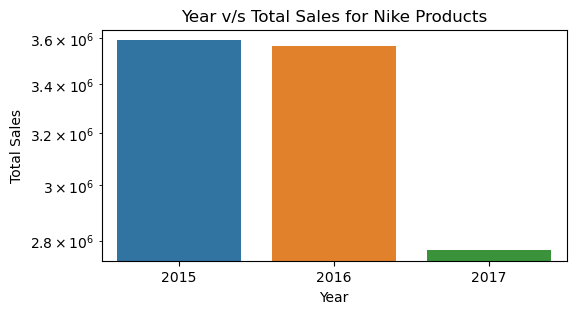

In [21]:
# Sales evolution
sales_sum = nike_df.groupby('year')['Sales'].sum().reset_index().sort_values(by='year')

# Visualization
plt.figure(figsize=(6, 3), dpi=100)
plt.title('Year v/s Total Sales for Nike Products')
sns.barplot(x='year', y='Sales', data=sales_sum)
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

In [22]:
# average sales by year
nike_df.groupby('year')['Sales'].mean()

year
2015    172.985587
2016    170.969701
2017    176.390038
Name: Sales, dtype: float64

### Question 3
What is our market distribution?

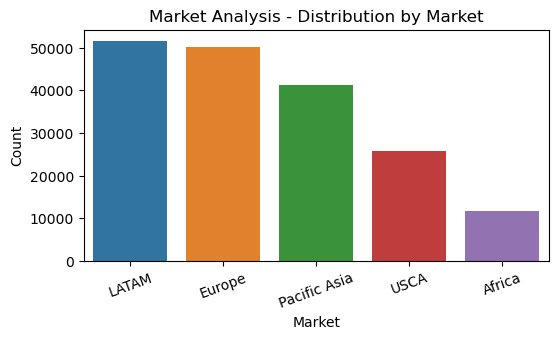

In [23]:
market_counts = df['Market'].value_counts()

# Visualization
plt.figure(figsize=(6, 3))
sns.barplot(x=market_counts.index, y=market_counts.values)
plt.title('Market Analysis - Distribution by Market')
plt.xlabel('Market')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.show()

### Question 4
What is our customer segment distribution?

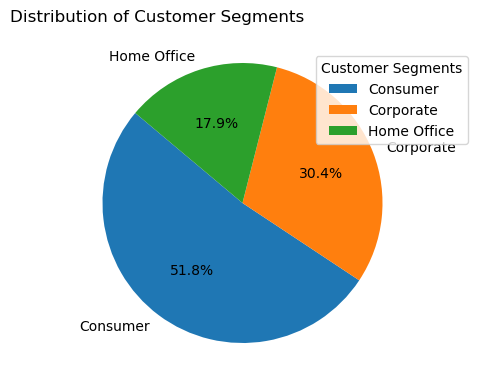

In [24]:
customer_segment_counts = df['Customer Segment'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(customer_segment_counts, labels=customer_segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customer Segments',loc='left', pad=20)
plt.axis('equal')
plt.legend(customer_segment_counts.index, title='Customer Segments', loc='best')
plt.show()

## VI. Supply Chain Analysis

### Question 1
How many successfully processed orders have days for shipping real (Real) > Days for shipment (Scheduled)

In [25]:
new_df = df[(df['Days for shipping (real)']) > df['Days for shipment (scheduled)']]
print('Number of successfully processed orders: ',new_df.shape[0])

Number of successfully processed orders:  103400


In [26]:
new_df[new_df['Order Status'] == 'COMPLETE'].head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Fname,Customer Id,Customer Lname,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,nike
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,Constance,19487,Terrell,Home Office,PR,1879 Green Pine Bank,725.0,2,Fitness,18.242538,-66.037056,Pacific Asia,Guangzhou,China,19487,1/13/2018 10:42,75934,1360,39.330002,0.12,179249,327.75,0.33,1,327.75,288.420013,95.180000,Eastern Asia,Guangdong,COMPLETE,1360,73,Smart watch,327.75,0,1/15/2018 10:42,First Class,0
13,DEBIT,2,1,24.580000,245.809998,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,Natalie,19480,Mcfadden,Corporate,PR,2531 Wishing Square,725.0,2,Fitness,18.278439,-66.037056,Pacific Asia,Sangli,India,19480,1/13/2018 8:15,75927,1360,81.940002,0.25,179242,327.75,0.10,1,327.75,245.809998,24.580000,South Asia,Maharashtra,COMPLETE,1360,73,Smart watch,327.75,0,1/15/2018 8:15,First Class,0
15,DEBIT,2,1,-259.579987,324.470001,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,Sade,19478,Lancaster,Corporate,PR,257 Harvest Close,725.0,2,Fitness,18.284050,-66.037056,Pacific Asia,Sangli,India,19478,1/13/2018 7:33,75925,1360,3.280000,0.01,179240,327.75,-0.80,1,327.75,324.470001,-259.579987,South Asia,Maharashtra,COMPLETE,1360,73,Smart watch,327.75,0,1/15/2018 7:33,First Class,0
18,DEBIT,2,1,102.260002,314.640015,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,Bo,19475,Griffin,Consumer,PR,5136 Rustic Pioneer Estates,725.0,2,Fitness,18.233778,-66.037064,Pacific Asia,Jabalpur,India,19475,1/13/2018 6:30,75922,1360,13.110000,0.04,179237,327.75,0.33,1,327.75,314.640015,102.260002,South Asia,Madhya Pradesh,COMPLETE,1360,73,Smart watch,327.75,0,1/15/2018 6:30,First Class,0
25,DEBIT,6,2,131.169998,285.140015,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,Roary,19468,Wheeler,Corporate,PR,1426 Fallen Line,725.0,2,Fitness,18.261633,-66.037056,Pacific Asia,Mandurah,Australia,19468,1/13/2018 4:03,75915,1360,42.610001,0.13,179230,327.75,0.46,1,327.75,285.140015,131.169998,Oceania,Australia Occidental,COMPLETE,1360,73,Smart watch,327.75,0,1/19/2018 4:03,Second Class,0


### Question 2
What is the dilivery status distribution for all orders?

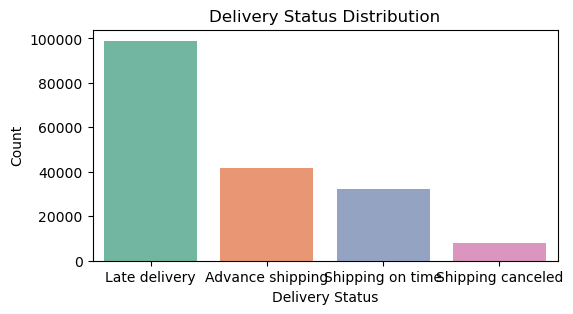

In [27]:
delivery_status_summary = df['Delivery Status'].value_counts().reset_index()
delivery_status_summary.columns = ['Delivery Status', 'Count']

# Visualization
plt.figure(figsize=(6, 3))
ax = sns.barplot(data=delivery_status_summary, x='Delivery Status', y='Count', palette='Set2')
plt.title('Delivery Status Distribution')
plt.xlabel('Delivery Status')
plt.ylabel('Count')
plt.show()